
# Вспомним Алгоритм обратного распространения

<img src="./imgs/01.png" width=500>

Нам нужно вычислить градиент: $\large \frac{\partial f}{\partial x}$; $\large \frac{\partial f}{\partial w} $; $\large \frac{\partial f}{\partial b} $

Далее обновляем веса по алгоритму градиентного спуска:
$$
\large
w' = w - \lambda \frac{\partial f}{\partial w}
$$

### В реальном мире мы имеем
1.  $\large X $ - пространство входных значений размерностью $ |M|$
2.  $\large Y $ - пространство целевых предсказаний размерностью $ |M|$
3.  $\large L(x,y,\theta) $ - ошибка
4.  $\large F(\theta) $ - функция преобразования $\large X \to Y $ 

Градиентный спуск, для обновления весов будет выглядеть так:
$$
\large \theta' = \theta - \lambda \frac{\partial L}{\partial \theta} 
$$

# Minibatch SGD

### Классический SGD:
$$
\large
\theta' = \theta - \lambda \frac{1}{M} \sum_{i=1}^{M}\frac{\partial L_i}{\partial \theta}
$$

Сложность - $\large O(M) $

### Mini-batch SGD, позволяет использовать ресурсы GPU эффективней
$$
\large
\theta' = \theta - \lambda \frac{1}{B} \sum_{i=1}^{B}\frac{\partial L_i}{\partial \theta}
$$


# Продвинутые методы оптимизации
## Проблемы
- SGD - медленно сходится
- SGD - может застрять в локальном минимуме
- SGD - не решает проблему редких признаков  

## SGD + Momentum
### Ускоряет схождение

$$
\Large
\begin{align}
m_t &= \alpha m_{t-1} - \lambda \nabla_{\theta} ( \sum_{i=1}^{M} L_i ) \\
\theta_t &= \theta_{t-1} + m_t
\end{align}
$$
<img src="./imgs/4.gif" width=500>



## Adagrad - (Adaptive gradient)
### Решаем проблему редких признаков
$$
\Large
\begin{align}
g_t &= \nabla_{\theta} ( \sum_{i=1}^{M} L_i ) - градиент \\
G_t &= G_t + g_{t}^2 - аккумулятор\ градиента\\
\theta_{t} &= \theta_{t-1} - \frac{\lambda}{\sqrt{G+\epsilon}} g_t
\end{align}
$$

## RMSProp (Root Mean Square Propagation)
### Исправляет недостаток adagrad - паралич
$$
\Large
\begin{align}
E[g^2]_t &- скользящее\ среднее \\
E[g^2]_t &= \beta * E[g^2]_{t-1} +  (1-\beta)* g_{t}^2  \\
\theta &= \theta - \lambda \frac{1}{\sqrt{E[g^2]_t + \epsilon}} g_t
\end{align}
$$
### Долго накапливает начальные значения 

## Adam (Adaptive Moment Estimation) 

Adam = SGD + Momentum + RMSProp

$$
\large
\begin{align}
m_t &= \alpha \ m_{t-1} + (1 - \alpha)\ g - момент \\ 
v_t &= \beta \ v_{t-1} +  (1-\beta)\ g_{t}^2  - скользящее\ среднее \\
\\
& исправляем \ недостаток \ RMSProp \\
\hat{m_t} &= \frac{m_t}{1 - \alpha^2} \\
\hat{v_t} &= \frac{v_t}{1 - \beta^2} \\
\theta_t &= \theta_{t-1} -  \frac{\lambda}{\sqrt{\hat{v_t} + \epsilon}}\hat{m_t}
\end{align}
$$



<img src="./imgs/6.gif" width=500>

# Откуда пошли сверточные сети

# 1958 - Hubel and Wiesel

<img src="./imgs/7.jpg" width=500>

<img src="./imgs/9.png" width=500>

- **Simple cells**: дают ответ на ориентацию света 
- **Complex cells**: ответ ориентацию света и движение 
- **Hypercomplex cells**: ответ на движение с конечной точкой
<img src="./imgs/cat_exp.png" width=500>

## 1980 - Neocognitron (Fukushima)

<img src="./imgs/10.jpg" width=400>
<img src="./imgs/11.gif" width=400>


# 1998 LeNet-5 (LeCun et.al.)

<img src="./imgs/12.png" width=700>


# 2012 AlexNet

<img src="./imgs/14.png">
**ImageNet**
- 1000 классов
- 1.2М обучение, 100К тест

**AlexNet**:
<img src="./imgs/13.png">

**AlexNet + ImageNet**:
<img src="./imgs/15.png">


# Взрывной рост GPU
<img src="./imgs/16.jpg">


# Основные блоки нейронных сетей

<img src="./imgs/17.jpg">

# PyTorch Autograd

<img src="./imgs/24.png">

- data: $z = f(x)$
- creator: $f$
- grad: $\large \frac{\partial z}{\partial x}$

In [1]:
import torch
from torch.autograd import Variable


class MyReLU(torch.autograd.Function):

    def forward(self, input):
        """
        In the forward pass we receive a Tensor containing the input and return a
        Tensor containing the output. You can cache arbitrary Tensors for use in the
        backward pass using the save_for_backward method.
        """
        self.save_for_backward(input)
        return input.clamp(min=0)

    def backward(self, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = self.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input

dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold input and outputs, and wrap them in Variables.
x = Variable(torch.randn(N, D_in).type(dtype), requires_grad=False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad=False)

# Create random Tensors for weights, and wrap them in Variables.
w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad=True)
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad=True)

learning_rate = 3.5e-6
for t in range(10):
    # Construct an instance of our MyReLU class to use in our network
    relu = MyReLU()

    # Forward pass: compute predicted y using operations on Variables; we compute
    # ReLU using our custom autograd operation.
    y_pred = relu(x.mm(w1)).mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.data[0])

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data

    # Manually zero the gradients after updating weights
    w1.grad.data.zero_()
    w2.grad.data.zero_()

0 25895408.0
1 295104064.0
2 1303873280.0
3 206602880.0
4 11964095488.0
5 16240678535168.0
6 4.736620195546288e+23
7 inf
8 nan
9 nan


# PyTorch NN

In [2]:
import torch
from torch.autograd import Variable

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs, and wrap them in Variables.
x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Variables for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
for t in range(10):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Variable of input data to the Module and it produces
    # a Variable of output data.
    y_pred = model(x)

    # Compute and print loss. We pass Variables containing the predicted and true
    # values of y, and the loss function returns a Variable containing the
    # loss.
    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Variables with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Variable, so
    # we can access its data and gradients like we did before.
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 676.4376220703125
1 624.7195434570312
2 580.0752563476562
3 540.8612060546875
4 505.9698791503906
5 474.42413330078125
6 445.9966125488281
7 419.9974060058594
8 395.9068603515625
9 373.6114196777344


In [3]:
# -*- coding: utf-8 -*-
import torch
from torch.autograd import Variable

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs, and wrap them in Variables.
x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
loss_fn = torch.nn.MSELoss(size_average=False)

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Variables it should update.
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(10):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable weights
    # of the model)
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

0 737.3788452148438
1 718.4356689453125
2 700.135009765625
3 682.3611450195312
4 665.1253051757812
5 648.4312133789062
6 632.147216796875
7 616.2778930664062
8 600.9116821289062
9 585.9879150390625


# Сверточный слой

<img src="./imgs/18.jpg">

<img src="./imgs/19.png">
Типичные размеры фильтров: 1х1, 3х3, 5х5,


Картинка = тензор размера (ширина, высота, число каналов)
<img src="./imgs/20.png" width=300>

1 слой состоит из нескольких филтров (filter bank)
<img src="./imgs/21.png" width=400>



Stride
<img src="./imgs/22.gif" width=300>

Padding
<img src="./imgs/23.gif" width=400>


## Свертка в PyTorch

```python
class torch.nn.Conv2d(
    in_channels,  # Число каналов на входе
    out_channels, # Число каналов на выходе
    kernel_size,  # Размер ядра свертки
    stride=1,     # Шаг свертки
    padding=0,    # Сколько прибавлять по краям
    dilation=1, groups=1, bias=True) # Параметры не интересные в нашем курсе
```

- Вход: $(N, C_{in}, H_{in}, W_{in})$
- Выход: $(N, C_{out}, H_{out}, W_{out})$
- Есть варинаты 1d (для звука, например) и 3d (для объемных томограмм например)


# Transposed convolution

<img src="./imgs/25.gif" width=400>
<img src="./imgs/28.png">


```python
class torch.nn.ConvTranspose2d
```

# Pooling

<img src="./imgs/26.jpg" width=400>
<img src="./imgs/27.jpg" width=400>


# Активация
```python
class torch.nn.Sigmoid
```
Чем плох сигмойд?
<img src="./imgs/29.png" >
<img src="./imgs/30.png" >

```python
class torch.nn.ReLU(inplace=False)
```
<img src="./imgs/31.png" >


```python
class torch.nn.Softmax
class torch.nn.Softmax2d
```
$$\large {Softmax}_j(x) = \frac{exp(x_j)}{\sum_i exp(x_i)}$$

# Dropout
<img src="./imgs/33.png" >
<img src="./imgs/34.png" >
<img src="./imgs/35.png" >

```python
class torch.nn.Dropout(
class torch.nn.Dropout2d(
    p=0.5,         # % фичей, которые нужно занулить
    inplace=False  # делать ли оптимизацию
```
   

# Batch Normalization

<img src="./imgs/36.png" >

Можно показать, что это происходит не только с входными данными, но и с выходами слоёв, даже если входные данные нормализованы (см [Andrej Karpathy cs231n](https://youtu.be/gYpoJMlgyXA?list=PLkt2uSq6rBVctENoVBg1TpCC7OQi31AlC&t=2221)).

Решение проблемы - нормализация данных внутри сети - Batch Normalization [Ioffe, Szegedy 2015](https://arxiv.org/pdf/1502.03167.pdf)

<img src="./imgs/37.png" width=400>

$$
y = \frac{x - mean[x]}{ \sqrt{Var[x] + \epsilon}} * gamma + beta
$$

<img src="./imgs/38.png" width=400>


```python
class torch.nn.BatchNorm2d(
    num_features,   # Число фильтров, которое следует ожидать на входе
    eps=1e-05,      # Epsilon из знаменателя
    momentum=0.1,   # Момент, с которым идет накопление среднего и дисперсии
    affine=True)    # учить gamma и beta
```



# Loss функции

```python
class torch.nn.MSELoss
class torch.nn.CrossEntropyLoss # Комбинация Cross Entropy и Softmax в одном слое
class torch.nn.NLLLoss # Оптимизация правдоподобия, на вход ожидает логарифмы вероятностей (выход LogSoftmax)
```


# Put it all togather
Решаем MNIST

In [4]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [5]:
# Загружаем MNIST
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='./')
X = mnist['data']
# переходим к формату тензоров pytorch
X = X.reshape((-1, 1, 28, 28))
X = X.astype('float')
print(X.shape)

(70000, 1, 28, 28)


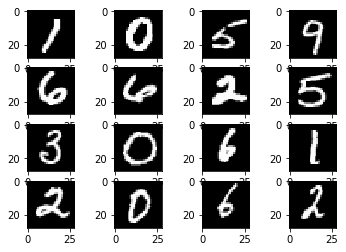

In [6]:
n=4
for i in range(n*n):
    plt.subplot(n,n,i+1)
    I = X[np.random.randint(0, X.shape[0]),0]
    plt.imshow(I, cmap='gray')

In [7]:
from sklearn.preprocessing import OneHotEncoder

Y = mnist['target'].astype('int')
print('original', Y)


original [0 0 0 ..., 9 9 9]


In [8]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.autograd import Variable

class Net(nn.Module):

    # Слои, в которых нет параметров для обучения можно не создавать, а брать из переменной F
    def __init__(self):
        super(Net, self).__init__()
        self.bn1 = nn.BatchNorm2d(1)
        self.conv1 = nn.Conv2d(1, 8, 5) # in 28x28, out 24x24
        self.bn2 = nn.BatchNorm2d(8)
        # relu
        # max pooling  # in 24x24, out 12x12
        self.conv2 = nn.Conv2d(8, 16, 5)  # in 12x12, out 8x8
        self.bn3 = nn.BatchNorm2d(16)
        # relu
        # max pooling # in 8x8 out 4x4
        # flatten
        self.fc1 = nn.Linear(16 * 4 * 4, 10)
        # relu
        # log softmax

    def forward(self, x):
        x = self.bn1(x)
        x = self.conv1(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.conv2(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        # Вытягиваем многомерный тензор катринки в одну линию
        x = x.view(-1, 16 * 4 * 4)
        x = self.fc1(x)
        x = F.relu(x)
        x = F.log_softmax(x)
        return x
   
net = Net()
print(net)

Net (
  (bn1): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True)
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True)
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True)
  (fc1): Linear (256 -> 10)
)


Done epoch 0 with loss 5997.0782039910555
Done epoch 1 with loss 3870.3567040995695
Done epoch 2 with loss 3663.919969537761


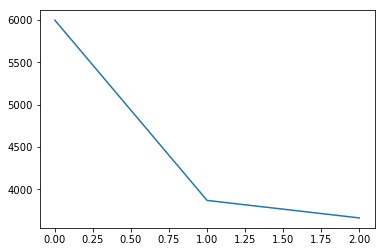

In [9]:
loss_fn = torch.nn.NLLLoss()

learning_rate = 1e-4
batch_size = 10
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
loss_curve = []

for iter in range(3):
    Xperm = np.random.permutation(X.shape[0])
    loss_acc = 0
    for b in range(X.shape[0]//batch_size):
        batch_idxs = Xperm[b*batch_size:(b+1)*batch_size]
        x = Variable(torch.Tensor(X[batch_idxs]))
        y = Variable(torch.LongTensor(Y[batch_idxs]))
        y_pred = net(x)
              
        loss = loss_fn(y_pred, y)
        loss_acc += loss.data[0]
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Done epoch %s with loss %s' % (iter, loss_acc))
    loss_curve.append(loss_acc)
    
plt.plot(loss_curve)

# Версия для GPU  (TODO)

Done epoch 0 with loss 5949.606306631118
Done epoch 1 with loss 3948.5450146319345
Done epoch 2 with loss 3747.4483473059954


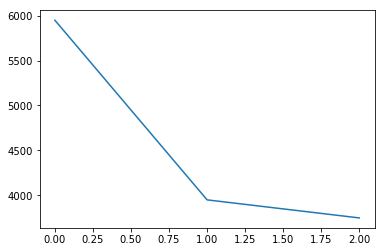

In [10]:
net = Net()

loss_fn = torch.nn.NLLLoss()

learning_rate = 1e-4
batch_size = 10
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
loss_curve = []

for iter in range(3):
    Xperm = np.random.permutation(X.shape[0])
    loss_acc = 0
    for b in range(X.shape[0]//batch_size):
        batch_idxs = Xperm[b*batch_size:(b+1)*batch_size]
        x = Variable(torch.Tensor(X[batch_idxs]))
        y = Variable(torch.LongTensor(Y[batch_idxs]))
        y_pred = net(x)
              
        loss = loss_fn(y_pred, y)
        loss_acc += loss.data[0]
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Done epoch %s with loss %s' % (iter, loss_acc))
    loss_curve.append(loss_acc)
    
plt.plot(loss_curve)

# Augmentation

<img src="./imgs/32.png" >
<img src="./imgs/41.png" >


# Home Work 1

## CIFAR-10
<img src="./imgs/40.png" width=600 >

https://www.cs.toronto.edu/~kriz/cifar.html
- 32х32 цветные картинки
- 10 не пересекающихся классов
- 50к train + 10k test (сбалансированно по классам)


## Kaggle

https://www.kaggle.com/c/2017h2-mifi-bnn-hw1/host


# Почитать

- https://m2dsupsdlclass.github.io/lectures-labs/slides/03_conv_nets/index.html
- http://pytorch.org/tutorials/index.html

<img src="./imgs/50.jpg" width=600 >
